<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه سوم </b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراح:‌ محمدامیر خانی

<hr>
</div>
</font>



<font face="B Mitra" size=5>
<div dir=rtl>
 import کتاب‌‌‌‌‌خانه‌های کمکی، صرفا دو سلول پایین را اجرا کنید.
<hr>

In [2]:
import cv2
import requests # For reading image from URL
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

In [3]:
def download_image_from_url(url):
    filename, ext = url.split("/")[-1].split(".")
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200 indicates success)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        # Specify the path where you want to save the image
        save_path = f"{filename}.{ext}"  # Replace with the desired file name and location
        # Open a binary file in write mode and write the image data to it
        with open(save_path, "wb") as file:
            file.write(image_data)
        print(f"Image downloaded and saved as {save_path}")
        return cv2.imread(save_path)
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>۱. انواع فشرده سازی تصاویر</b>
</font>

<br>
<p align="justify">
<font size=4>
<p>شما در درس با انواع فشرده‌سازی از جمله فشرده‌سازی‌های Lossless و Lossy آشنا شدید. حال به پیاده‌سازی این روش‌های فشرده‌سازی بر روی تصاویر می‌پردازیم.</p>

</p>

<p>
<font size=4>
فشرده‌سازی Lossy مانند فشرده‌سازی Lossless است. با این تفاوت که برای حصول فشرده‌سازی بیشتر، حاضر می‌شود برخی اطلاعات در تصویر اصلی را از دست بدهد. به عبارت دقیق‌تر، در فشرده‌سازی Lossy هنگام تبدیل ماتریس به تصویر به داده‌های کم حجم‌تر، برخی داده‌های بی اهمیت حذف می‌شوند.
به این‌ترتیب داده‌های فشرده‌شده دقیقا به ماتریس تصویر اولیه تبدیل نمی‌شود.
فشرده‌سازی Lossy بطور گسترده در تصاویری که کاهش کیفیت کمی قابل پذیرش است، استفاده می‌شود.
</font>
</p>

</div>
</font>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
<b> ۱.۱.۱ PNG و JPEG</b>
</font>
<p>
PNG مخفف Portable Network Graphics است. در این الگوریتم با استفاده از تئوری اطلاعات و فیتلرینگ، تصویر بدون از‌دست‌رفت جزئیات فشرده می‌شود. البته کاهش سایز فایل به اندازه فرمت JPEG محسوس نیست. PNG به عنوان جایگزینی برای فرمت GIF ارائه شده است و تا حد خوبی توانسته این نقش را ایفا کند. از جمله دلایل دیگری که ممکن است به استفاده از این فرمت بپردازید پشتبانی از Alpha Transparency است. برای درک این مفهوم به تصویر تاس‌ها در پایین سمت راست نگاه کنید. انگار تاس‌ها در فضا معلق هستند. در واقع در این فرمت، علاوه بر اطلاعات رنگ، اطلاعات مربوط به transparency (شفافیت) هم برای هر پیکسل ذخیره می‌شود. اگر این تصویر با فرمت JPEG ذخیره می‌شد ناچار بودیم رنگی برای پس‌زمینه انتخاب کنیم (پایین سمت چپ)

در مقابل، فرمت JPEG با از دست دادن بخشی از جزئیات، حجم فایل را به شکل قابل توجهی کاهش می‌دهد.موارد استفاده آن در کاربردهایی است که از دست دادن بخش کوچکی از اطلاعات قابل قبول است مثلا تصویر پروفایل در تلگرام، یا سند‌های اداری
</p>

<div style="display: flex; justify-content: center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png" alt="Image 1" width="400">
  <img src="https://i.ibb.co/xX9Szmr/PNG-transparency-demonstration-1.jpg" width="400" />
</div>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=4>
<b> ۲.۱.۱ BMP (Bitmap Image File) </b>

<p>
مخفف Bitmap Image File است و توسط Microsoft طراحی شده است. این فرمت هیچ‌گونه فشرده‌سازی‌ای انجام نمی‌دهد و تمامی مقادیر رنگ‌ها را برای هر پیکسل همان‌طور که هست ذخیره می‌کند. از جمله برتری‌های فرمت BMP نسبت به فرمت‌های ذکر شده، سادگی کار با آن است. مقدار هر پیکسل به ترتیب از بالا به پایین و یا پایین به بالا در داخل فایل قرار دارد. به دلیل حجم بالای فایل‌ها، مناسب استفاده در فضای وب نیست و در مواردی کاربر دارد که تصویر به شکل آفلاین بارگذاری می‌شود. مثلا آیکون‌ها در ویندوز همگی از این  فرمت استفاده می‌کنند.

</p>
</p>
</font>

<hr>
<font size=4>
<b> ۳.۱.۱ TIFF (Tagged Image File Format) </b>

<p>
مخفف Tagged Image File Format، فرمتی است که معمولا توسط گرافیست‌ها، طراحان و یا در تصویر برداری علمی استفاده می‌شود. از داشتن چندین لایه در تصویر پشتیبانی می‌کند که اگر با نرم افزار فتوشاپ کار کرده‌باشید با مفهوم لایه آشنا هستید.از عمق رنگ‌های متفاوتی پشتیبانی می‌کند که در هنگام ذخیره تصویر می‌توانید آن را تنظیم کنید. همچنین، می‌توانید چندین تصویر یا در یک فایل بگنجانید!
</p>

<hr>
<font size=4>
<b> GIF (Graphics Interchange Format) ۴.۱.۱  </b>

<div>
<img src="https://media.giphy.com/media/3ov9jQX2Ow4bM5xxuM/giphy.gif" width=400 />
</div>
<p>
احتمالا بیش‌ترین برخورد شما با این فرمت درموقع مواجه با تصاویر متحرک بوده (مثل تصویر بالا). اگر همین الان به گیف‌هایی که تا الان برای دوستانتان ارسال کرده‌اید نگاه کنید متوجه می‌شوید که همه‌ی آنها کیفیت زیادی ندارند. دلیل این پدیده عمق رنگ است. عمق رنگ در فرمت گیف، 8 بیت است به این معنا که 256 رنگ برای هر پیکسل ممکن است. در مقابل، PNG عمق رنگ 224 بیتی دارد یعنی 16.8 میلیون رنگ برای هر پیکسل!
</p>

<hr/>
<font size=4>
<p>
<h2> WebP (Graphics Interchange Format) ۵.۱.۱  </h2>

یک فرمت تصویر مدرن که فشرده سازی بدون اتلاف تصاویر را در وب فراهم می کند.

<hr>

<hr>
<b>
<p font="B Mitra">در ادامه نحوه‌ی تبدیل یک تصویر از یک فرمت به فرمت دیگر با استفاده از متد imwrite نمایش داده شده است.
تصویر از فرمت PNG به JPEG تبدیل شده است.
</p>
</p>
</b>

</div>
</font>

Image downloaded and saved as download.png


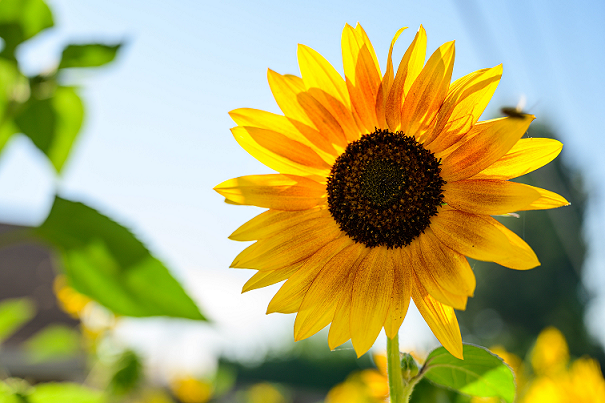

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/B30qmwM/download.png")
original_image_path = '/content/download.png'
original_image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(original_image)

<font face="B Mitra" size=10>
<div dir=rtl>

در هنگام ذخیره تصویر با پسوند JPEG می‌توانید میزان فشرده‌سازی را از طریق عددی
بین صفر تا صد بیان کنید. به این شکل که عدد 100 بیشترین کیفیت و کمترین میزان فشرده‌سازی را خواهد داشت.
لطفا در نظر داشته‌باشید که حتی اگر این مقدار را صد انتخاب کنید باز هم بخشی کوچکی از جزئیات تصویر اصلی از بین خواهد رفت.
در سلول پایین ما عدد 50 را به عنوان میزان فشرده‌سازی استفاده کردیم
</div>
</font>

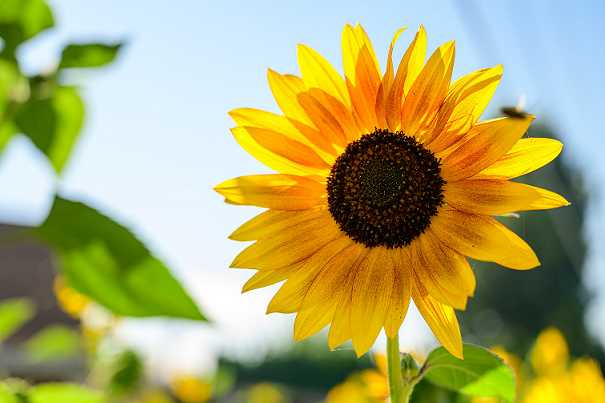

In [ ]:
format = 'JPEG'
jpeg_image_path = "converted_image.jpg"
cv2.imwrite(jpeg_image_path, original_image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])
img_converted = cv2.imread("/content/converted_image.jpg")
cv2_imshow(img_converted)

<hr>
<div dir=rtl>

<h3><font face="B Mitra" size=5><b>تمرین 1: بخش اول</b></font></h3>

<font face="B Mitra" size=4>
تصویر PNG یک سگ جذاب در متغیری برای شما قرار داده شده است. ضمن تبدیل این تصویر به فرمت JPEG. این دو فایل را از لحاظ کیفیت تصویر و حجم  فایل مقایسه کنید.
</font>

Image downloaded and saved as png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png


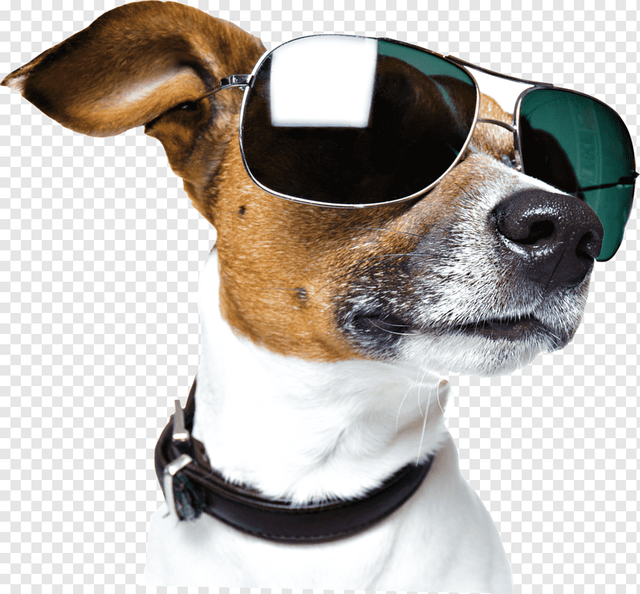

In [ ]:
cute_dog_image_png =  download_image_from_url("https://i.ibb.co/3vfcz9Y/png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png")
cv2_imshow(cute_dog_image_png)

original_image_path = '/content/png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png'
original_image = cv2.imread(original_image_path)

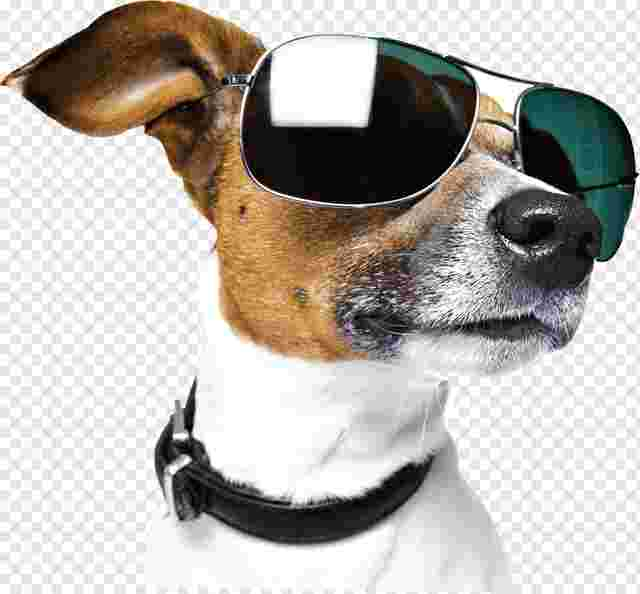

In [ ]:
format = 'JPEG'
jpeg_image_path = "converted_image.jpg"
cv2.imwrite(jpeg_image_path, original_image, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
img_converted = cv2.imread("/content/converted_image.jpg")
cv2_imshow(img_converted)

تصویر دوم دچار افت کیفیت شده و البته حجم آن نیز کاهش یافته است.

<hr>
<font face="B Mitra" size=4>
<div dir=rtl>


<p><font size = 5><b>تمرین ۱: بخش دوم</b></font></p>

<li>
فرض کنید می‌خواهید چندین فایل تصویری را در یک فایل ذخیره کنید. از چه فرمتی استفاده خواهید کرد؟ به عنوان مثال،
فرض کنید می‌خواهید تصویر کارت‌ ملی و شناسنامه خود را در قالب یک فایل برای فردی بفرستید. تصاویر مربوطه برای شما در متغیرهای shenasname_image و melli_image ذخیره شده‌ند. فایل نهایی را در فرمت مناسب تولید کنید. </li>

</font>

Image downloaded and saved as shenasname.jpg
Image downloaded and saved as melli-fake.jpg


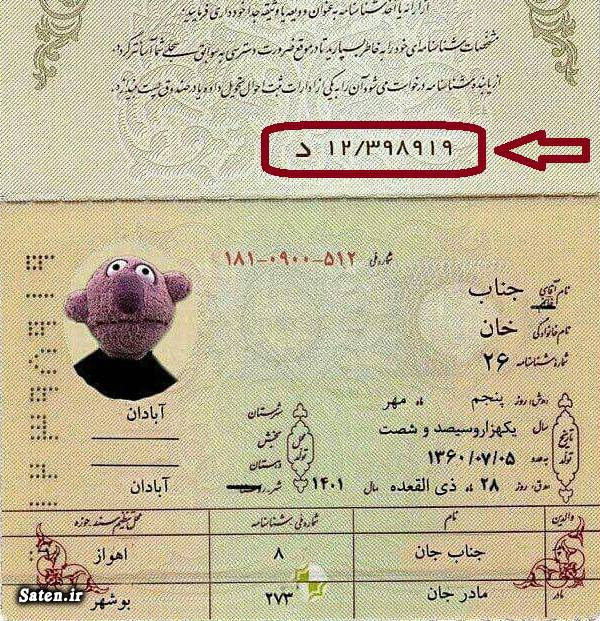

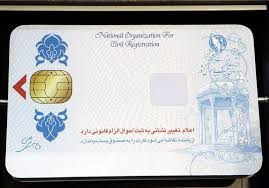

multi-page TIFF image is done.


In [4]:
shenasname_image = download_image_from_url('https://i.ibb.co/6vqyJt5/shenasname.jpg')
melli_image = download_image_from_url("https://i.ibb.co/xj0skgs/melli-fake.jpg")

cv2_imshow(shenasname_image)
cv2_imshow(melli_image)

shenasname_tiff_path = 'shenasname.tiff'
melli_tiff_path = 'melli.tiff'

shenas_RGB = cv2.cvtColor(shenasname_image, cv2.COLOR_BGR2RGB)
melli_RGB = cv2.cvtColor(melli_image, cv2.COLOR_BGR2RGB)

layer1 = Image.fromarray(shenas_RGB)
layer2 = Image.fromarray(melli_RGB)

layer1.save('layer1.tif', save_all=True, append_images=[layer2])

print("multi-page TIFF image is done.")



<hr>
<font face="B Mitra" size=4>
<div dir=rtl>


<p><font size = 5><b>تمرین ۱: بخش سوم</b></font></p>

<li>فرض کنید چند تصویر بامزه در گالری گوشی خود از دوستتان پیدا کردید و می‌خواهید یک گیف مناسب برای ایشان درست کنید. پس از اجرای سلول زیر(به کدهای داخل آن توجه نکنید)،یک فولدر به نام for_gif که شامل تعداد تصویر با فرمت JPEG است برای شما ایجاد می‌شود، فایل نهایی با فرمت GIF را تولید کنید. </li>
</font>

In [ ]:
!pip install gdown
import gdown
file_id = '1SSaoE9TGODHFXiB9qq4n3eLbkgwhN9DO'
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, 'for_gif.zip')
!unzip  "/content/for_gif.zip"

Downloading...
From: https://drive.google.com/uc?id=1SSaoE9TGODHFXiB9qq4n3eLbkgwhN9DO
To: /content/for_gif.zip
100%|██████████| 3.77M/3.77M [00:00<00:00, 24.2MB/s]


Archive:  /content/for_gif.zip
   creating: content/for_gif/
  inflating: content/for_gif/output_0100.jpg  
  inflating: content/for_gif/output_0155.jpg  
  inflating: content/for_gif/output_0005.jpg  
  inflating: content/for_gif/output_0185.jpg  
  inflating: content/for_gif/output_0065.jpg  
  inflating: content/for_gif/output_0135.jpg  
  inflating: content/for_gif/output_0020.jpg  
  inflating: content/for_gif/output_0130.jpg  
  inflating: content/for_gif/output_0175.jpg  
  inflating: content/for_gif/output_0090.jpg  
  inflating: content/for_gif/output_0055.jpg  
  inflating: content/for_gif/output_0125.jpg  
  inflating: content/for_gif/output_0190.jpg  
  inflating: content/for_gif/output_0160.jpg  
  inflating: content/for_gif/output_0165.jpg  
  inflating: content/for_gif/output_0105.jpg  
  inflating: content/for_gif/output_0110.jpg  
  inflating: content/for_gif/output_0060.jpg  
  inflating: content/for_gif/output_0040.jpg  
  inflating: content/for_gif/output_0075.jpg  

In [ ]:
import os
import imageio


image_folder = '/content/for_gif/'

images = []
for filename in sorted(os.listdir(image_folder)):
    if filename.endswith(".jpg"):
        images.append(imageio.imread(os.path.join(image_folder, filename)))


output_gif_path = '/content/output.gif'

imageio.mimsave(output_gif_path, images, duration=0.5)

print(f'GIF created and saved at: {output_gif_path}')



<ipython-input-9-f627d69b3555>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join(image_folder, filename)))


GIF created and saved at: /content/output.gif


<hr>

<font face="B Mitra" size=5>
<div dir=rtl>

<p></p>
<font size = 5>
<b>Downsampling</b>
</font>

<p>
<font size=4>
یکی از راه‌های ساده برای فشرده‌سازی تصاویر و کاهش حجم‌ آن‌ها استفاده از روش downsampling است.

downsampling در فشرده‌سازی تصویر، فرآیند کاهش تعداد پیکسل‌های یک تصویر برای برای ذخیره‌سازی با حجم کمتر و انتقال سریع‌تر است. این تکنیک، که منجر به از دست‌رفتن جزئیات می‌شود، شامل میانگین‌گیری یا دور انداختن پیکسل‌ها است و می‌تواند منجر به کاهش کیفیت تصویر شود، به‌ویژه اگر تصویر پس از فشرده‌سازی دوباره به سایز اصلی ریسایز شود.<br/> انتخاب تعداد کمتری پیکسل در عین حفظ کیفیت بصری چالشی است که در این الگوریتم‌ها باید با آن دست و پنجه نرم کرد. <br/>
<img src="https://i.ibb.co/k1zQVCQ/downsample.png" />
در ادامه پیاده‌سازی این روش برای یک تصویر نمونه آورده شده است:
<br/>

</font>
</p>

In [ ]:
import matplotlib.pyplot as plt

# Define downsample_image function
def downsample_image(image, factor):

    # Calculate new width as original width divided by downsample factor
    new_width = image.width // factor

     # Calculate new height as original height divided by downsample factor
    new_height = image.height // factor

    # # Resize image to downsampled width and height
    downsampled_image = image.resize((new_width, new_height))

    return downsampled_image

In [ ]:
# Import Image from PIL
from PIL import Image

# Define function to create checkerboard image
def create_checkerboard(width, height, num_squares):

  # Create new black image
  image = Image.new("1", (width, height))

  # Get reference to pixels
  pixels = image.load()

  # Calculate square width
  square_width = width // num_squares

  # Loop through pixels
  for i in range(width):
    for j in range(height):

      # Check if pixel is at intersection of squares
      if (i // square_width) % 2 == (j // square_width) % 2:

        # Make pixel white
        pixels[i, j] = 1

  # Return checkerboard image
  return image

# Create 400x400 checkerboard with 20 squares
original_image = create_checkerboard(400, 400, 20)

In [ ]:
downsampled_image_2 = downsample_image(original_image, 2)
downsampled_image_8 = downsample_image(original_image, 8)

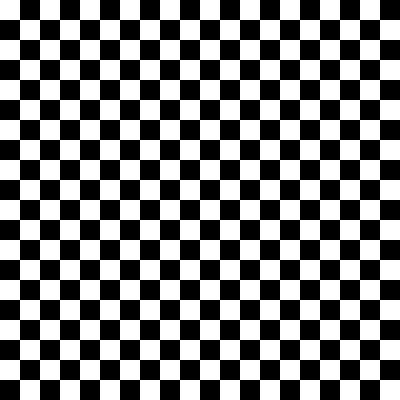

In [ ]:
original_image

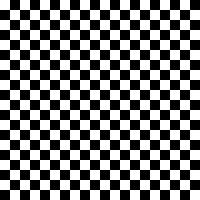

In [ ]:
downsampled_image_2

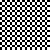

In [ ]:
downsampled_image_8

<hr>
<div dir=rtl>
<font size = 5>
<b>تمرین ۲</b>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size = 5>
برای انجام downsampling روش‌های مختلفی از جمله درون‌یابی، حذف پیکسل‌ها یا میان‌گیری وجود دارد. در این موارد تحقیق کرده و به دلخواه یک روش را روی تصویر پیاده سازی کنید. توجه کنید که در پیاده‌سازی خود از توابع آماده opencv استفاده نکنید.
</font>
</p>

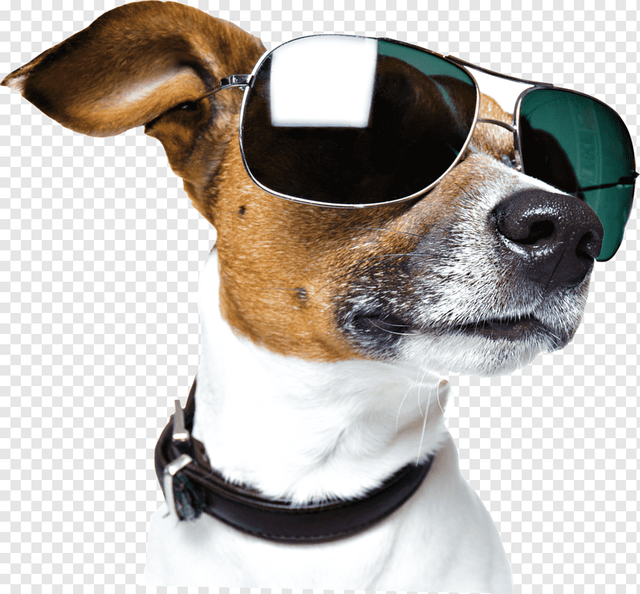

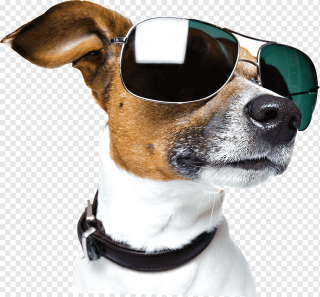

In [ ]:
def average_pooling(image, factor):
    height, width = image.shape[:2]
    new_height = height // factor
    new_width = width // factor

    result = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            avg_value = np.mean(image[i * factor: (i + 1) * factor, j * factor: (j + 1) * factor], axis=(0, 1))
            result[i, j] = avg_value.astype(np.uint8)

    return result


image_path = '/content/png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png'
image = cv2.imread(image_path)


downsampling_factor = 2

downsampled_image = average_pooling(image, downsampling_factor)
cv2_imshow(image)
cv2_imshow(downsampled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<hr>
<div dir=rtl>
<font size = 5>
<b>تمرین ۳: OCR</b>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size = 5>
همان‌طور که سر کلاس بحث شد. از شما می‌خواهیم تصویر فوق که از یک سند متنی گرفته شده‌است را پردازش کنید و به عنوان خروجی تصویری بدهید که دور هر کاراکتر یک کادر سبز رنگ کشیده شده‌است.
</font>
</p>

<h1>ورودی</h1>
<img src="https://i.ibb.co/QfgzMcQ/text-ocr.png" />

<h1>خروجی مورد نظر</h1>
<img src="https://i.ibb.co/PTjfxrb/ocr-output.png" />

In [ ]:
# Install Tesseract and pytesseract
!brew install tesseract
!pip install pytesseract
!pip install pillow


/bin/bash: line 1: brew: command not found


Image downloaded and saved as text-ocr.png


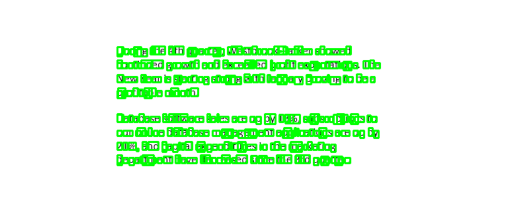

In [ ]:
import cv2
import pytesseract
from PIL import Image
import requests
from io import BytesIO

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

# URL of the image you want to download
original_image = download_image_from_url("https://i.ibb.co/QfgzMcQ/text-ocr.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Use Tesseract OCR to get bounding boxes around characters
custom_config = r'--oem 3 --psm 6'
boxes = pytesseract.image_to_boxes(gray_image, config=custom_config).splitlines()

# Draw green boxes around each character
for box in boxes:
    b = box.split()
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    original_image = cv2.rectangle(original_image, (x, original_image.shape[0] - y), (w, original_image.shape[0] - h), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
